<a href="https://colab.research.google.com/github/GustavoOliveira345/Heart-Health/blob/main/Ataque_Card%C3%ADaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
pip install feature-engine

In [237]:
pip install category_encoders

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders.binary import BinaryEncoder
import time
from sklearn.preprocessing import OrdinalEncoder
import plotly.io as pio
pio.renderers.default = 'colab'

# Set the style for visualization
sns.set_style("whitegrid")

from tqdm import tqdm

#from dtype_diet import report_on_dataframe, optimize_dtypes

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
from sklearn.compose import ColumnTransformer
import gc
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, average_precision_score, cohen_kappa_score, recall_score, f1_score, roc_auc_score, log_loss, brier_score_loss, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibrationDisplay, calibration_curve
from matplotlib.gridspec import GridSpec


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

#from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', 100)
#from feature_engine.outliers import OutlierTrimmer

In [239]:
from sklearn.preprocessing import OneHotEncoder
from feature_engine.encoding import OneHotEncoder

In [240]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [357]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', 45)
ff = pd.read_csv('/content/drive/MyDrive/heart_2022_with_nans.csv')
ff.tail()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
445131,Virgin Islands,Male,Very good,0.0,1.0,NaN,Yes,5.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,Former smoker,Not at all (right now),Yes,"Black only, Non-Hispanic",Age 40 to 44,1.68,63.50,22.60,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


In [243]:
ss = ff.copy()
ss.rename(columns={'Sex': 'Sexo'}, inplace=True)
ss.replace({'Sex': {'Female': 'Mulher', 'Male': 'Homem'}}, inplace=True)
ss.rename(columns={'HadHeartAttack': 'AtaqueCardíaco'}, inplace=True)
ss.rename(columns={'AgeCategory': 'Idade'}, inplace=True)
ss.rename(columns={'HadDiabetes': 'Diabetes'}, inplace=True)
ss.rename(columns={'SmokerStatus': 'Tabagismo'}, inplace=True)
ss.replace({'AtaqueCardíaco': {'No': 0, 'Yes': 1}}, inplace=True)
ss.replace({"PhysicalActivities": {'No': "Não", "Yes": 'Sim'}}, inplace=True)
ss.replace({'Diabetes': {'No': 'Não', 'Yes': 'Sim', 'Yes, but only during pregnancy (female)': 'Durante a gravidez', 'No, pre-diabetes or borderline diabetes': 'Pré-diabetes'}}, inplace=True)
ss.replace({'Tabagismo': {'Never smoked': 'Nunca fumou', 'Former smoker': 'Ex-fumante', 'Current smoker - now smokes every day' : 'Fumante atual - fuma todos os dias', 'Current smoker - now smokes some days': 'Fumante atual - fuma alguns dias'}}, inplace=True)

<ipython-input-243-1bdb8c7f7136>:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [244]:
ss.rename(columns={'Sex': 'Sexo'}, inplace=True)
ss.rename(columns={'HadHeartAttack': 'AtaqueCardiaco'}, inplace=True)
ss.rename(columns={'State': 'Estados'}, inplace=True)
ss.replace({'AtaqueCardiaco': {'No': 0, 'Yes': 1}}, inplace=True)
ss.head()

,Estados,Sexo,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,AtaqueCardíaco,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,Diabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,Tabagismo,ECigaretteUsage,ChestScan,RaceEthnicityCategory,Idade,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Não,8.0,NaN,0.0,No,No,No,No,No,No,No,No,Sim,No,No,No,No,No,No,Nunca fumou,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,Não,6.0,NaN,0.0,No,No,No,Yes,No,No,No,No,Não,No,No,No,No,No,No,Nunca fumou,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Sim,5.0,NaN,0.0,No,No,No,Yes,No,No,No,No,Não,No,No,No,No,No,No,Nunca fumou,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Sim,7.0,NaN,0.0,No,No,Yes,No,No,No,No,Yes,Não,No,No,No,No,No,No,Fumante atual - fuma alguns dias,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Sim,9.0,NaN,0.0,No,No,No,No,No,No,No,No,Não,No,No,No,No,No,No,Nunca fumou,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [245]:
def ased(aa):
  b= []
  c= []
  for i,a in enumerate(aa.AtaqueCardiaco):
    if i % 2 == 0:
      b.append(a)
    if i % 2 != 0:
      c.append(a)

  soma = []
  for d in range(0, len(c), 1):
    som = (b[d] + c[d])
    soma.append(som)


  rrr = []
  for f in range(0,len(c),1):
    rr = (c[f] / soma[f]) * 100
    rrr.append(rr)

  aaa = rrr.copy()
  for y in range(0,len(c) * 2,2):
    aaa.insert(y,0)

  aa['Percentage'] = aaa

  aaa = aa[aa['Percentage'] > 0]

  return aaa




In [246]:
ss['Idade'] = ss['Idade'].str.replace('Age', '', regex=True)
ss['Idade'] = ss['Idade'].str.replace('to', '-', regex=True)
ss['Idade'] = ss['Idade'].str.replace('or older', '+', regex=True)

Text(0.5, 1.0, 'Incidência de Ataques cardíacos')

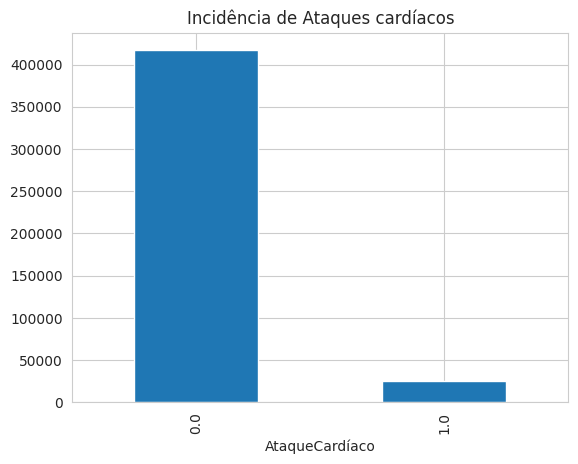

In [247]:
ss.groupby("AtaqueCardíaco").size().plot.bar()
plt.title("Incidência de Ataques cardíacos", fontsize=12)

In [248]:
ss.replace({'AtaqueCardíaco': {'Não': 0, 'Sim': 1}}, inplace=True)

In [249]:
ta = ss.groupby(['Tabagismo', 'AtaqueCardíaco']).size()
taa = pd.DataFrame(ta.items(), columns=['Tabagismo', 'AtaqueCardiaco'])

In [250]:
taa = ased(taa)

In [251]:
taa

,Tabagismo,AtaqueCardiaco,Percentage
1,"(Ex-fumante, 1.0)",9763,8.639135
3,"(Fumante atual - fuma alguns dias, 1.0)",978,7.075676
5,"(Fumante atual - fuma todos os dias, 1.0)",3178,8.906451
7,"(Nunca fumou, 1.0)",9305,3.803968


In [252]:
taa.set_index('Tabagismo', inplace=True)

Text(0, 0.5, 'Tabagismo')

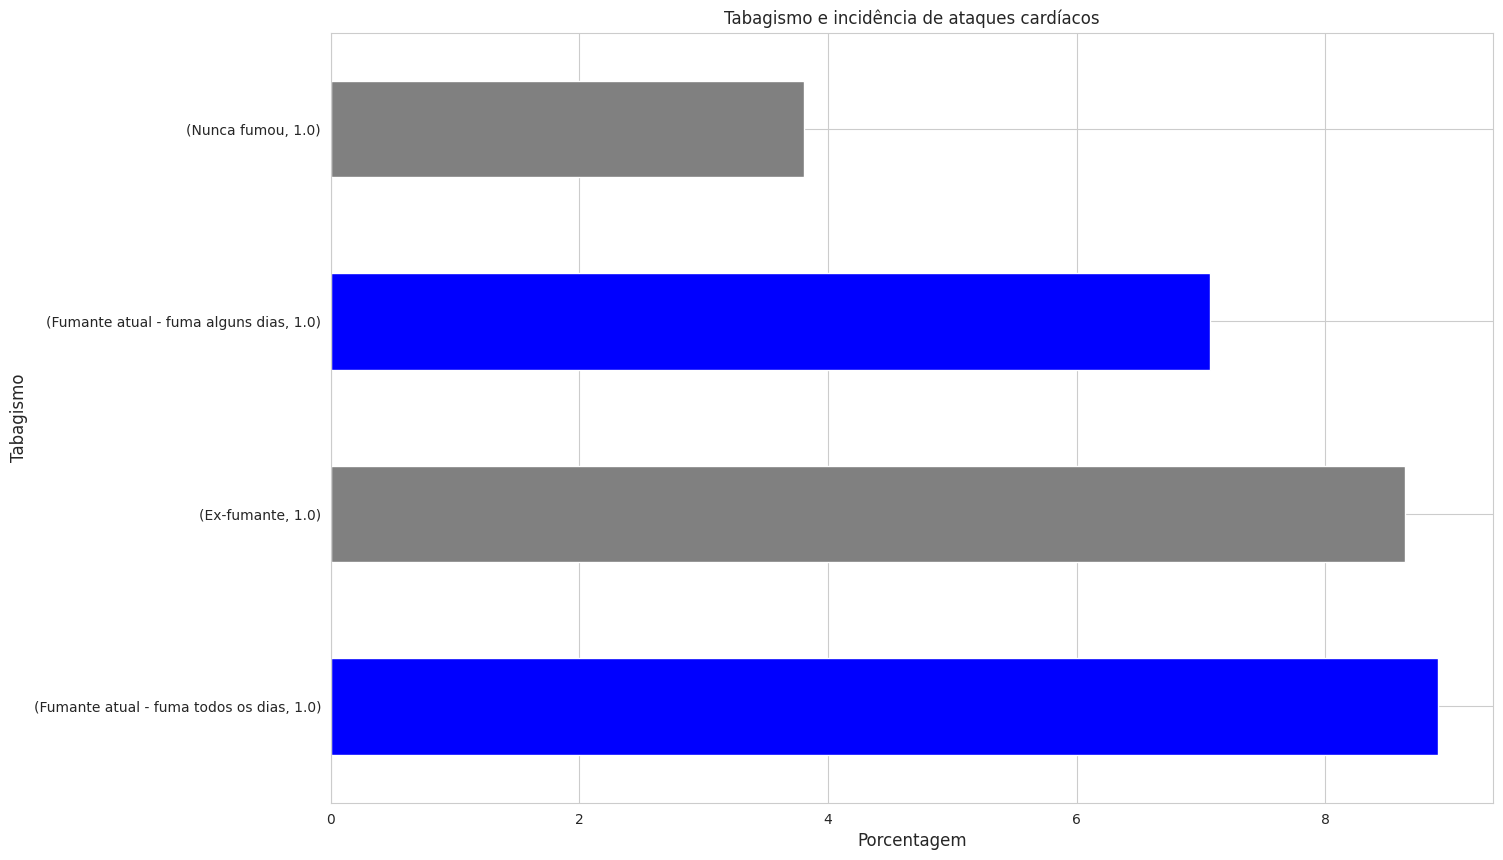

In [253]:
plt.figure(figsize=(15,10))
taa.Percentage.sort_values(ascending=False).plot.barh(color=['blue', 'gray'])
plt.title('Tabagismo e incidência de ataques cardíacos', fontsize=12)
plt.xlabel('Porcentagem', fontsize=12)
plt.ylabel('Tabagismo', fontsize=12)

In [254]:
ac = ss.groupby(['Diabetes', 'AtaqueCardíaco']).size()
ac

Diabetes            AtaqueCardíaco
Durante a gravidez  0.0                 3705
                    1.0                  111
Não                 0.0               351195
                    1.0                15473
Pré-diabetes        0.0                 9426
                    1.0                  785
Sim                 0.0                51897
                    1.0                 8662
dtype: int64

In [255]:
ca = pd.DataFrame(ac.items(), columns=['Diabetes', 'AtaqueCardiaco'])

In [256]:
cca = ased(ca)

In [257]:
cca.set_index('Diabetes', inplace=True)

Text(0, 0.5, 'Diabetes')

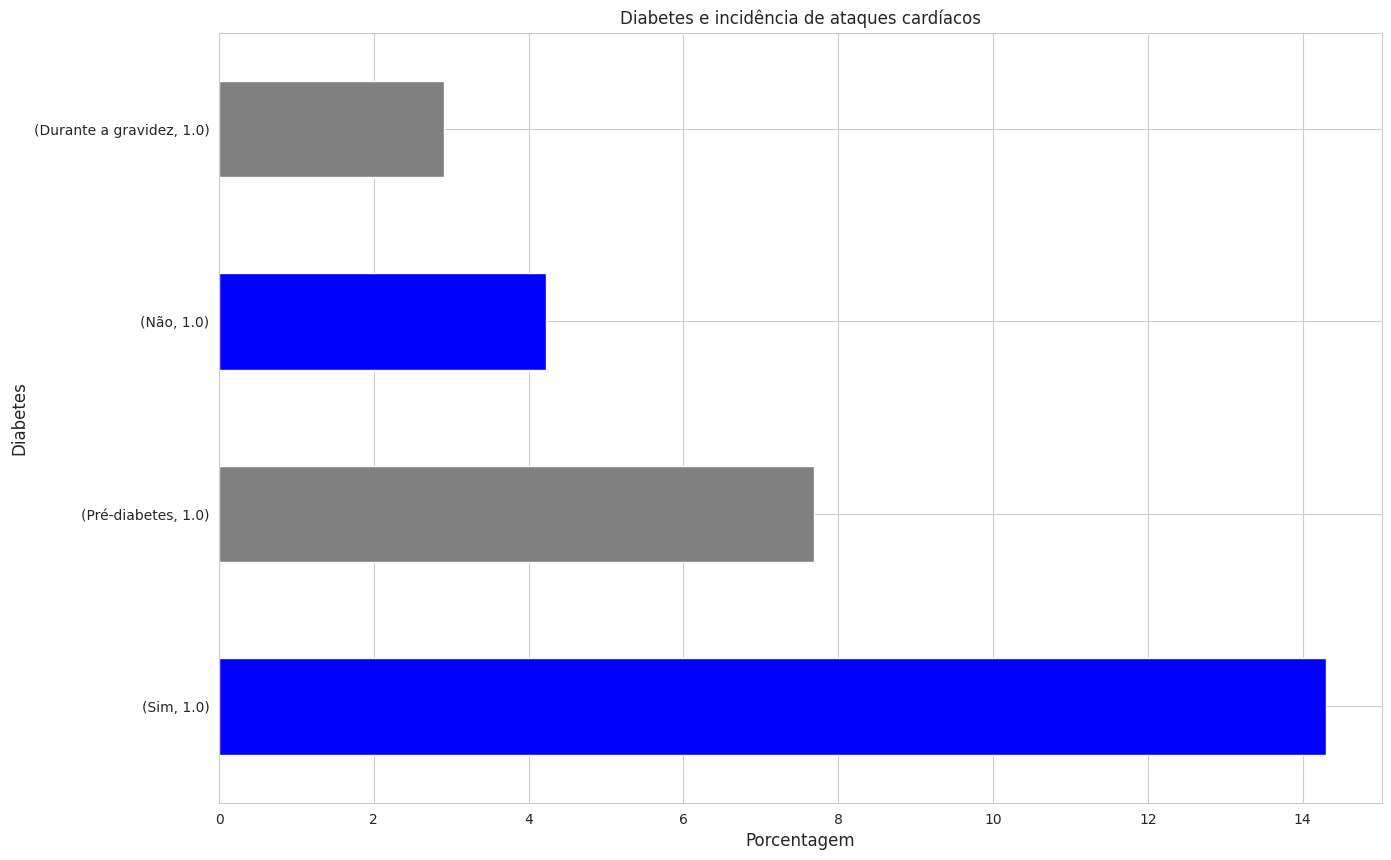

In [258]:
plt.figure(figsize=(15,10))
cca.Percentage.sort_values(ascending=False).plot.barh(color=['blue', 'gray'])
plt.title('Diabetes e incidência de ataques cardíacos', fontsize=12)
plt.xlabel('Porcentagem', fontsize=12)
plt.ylabel('Diabetes', fontsize=12)

In [259]:
af = ss.groupby(['Idade', 'AtaqueCardíaco']).size()
af

Idade    AtaqueCardíaco
18 - 24  0.0               26676
         1.0                 122
25 - 29  0.0               21782
         1.0                 119
30 - 34  0.0               25508
         1.0                 187
35 - 39  0.0               28067
         1.0                 318
40 - 44  0.0               29347
         1.0                 445
45 - 49  0.0               27677
         1.0                 728
50 - 54  0.0               32211
         1.0                1250
55 - 59  0.0               34668
         1.0                1960
60 - 64  0.0               41318
         1.0                2890
65 - 69  0.0               43108
         1.0                3700
70 - 74  0.0               38983
         1.0                4216
75 - 79  0.0               28453
         1.0                3789
80 +     0.0               30714
         1.0                5024
dtype: int64

In [260]:
aa = pd.DataFrame(af.items(), columns=['Idade', 'AtaqueCardiaco'])
aa

,Idade,AtaqueCardiaco
0,"( 18 - 24, 0.0)",26676
1,"( 18 - 24, 1.0)",122
2,"( 25 - 29, 0.0)",21782
3,"( 25 - 29, 1.0)",119
4,"( 30 - 34, 0.0)",25508
5,"( 30 - 34, 1.0)",187
6,"( 35 - 39, 0.0)",28067
7,"( 35 - 39, 1.0)",318
8,"( 40 - 44, 0.0)",29347
9,"( 40 - 44, 1.0)",445


In [261]:
aa = ased(aa)

Text(0, 0.5, 'Idade')

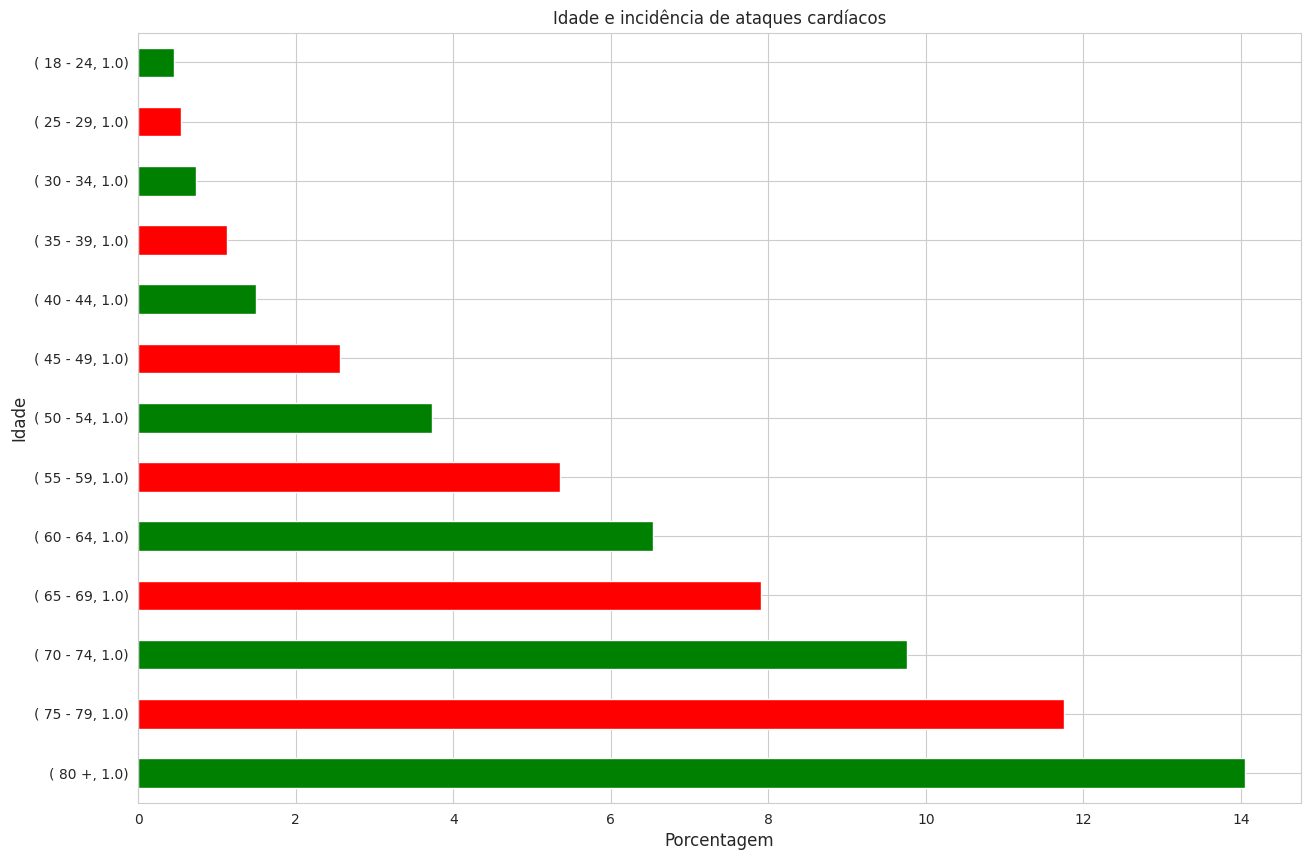

In [262]:
plt.figure(figsize=(15,10))
aa.set_index('Idade', inplace=True)
aa.Percentage.sort_values(ascending=False).plot.barh(color=['green', 'red'])
plt.title('Idade e incidência de ataques cardíacos', fontsize=12)
plt.xlabel('Porcentagem', fontsize=12)
plt.ylabel('Idade', fontsize=12)

In [263]:
ph = ss.groupby(['PhysicalActivities', 'AtaqueCardíaco']).size()

In [264]:
ph.replace()

<ipython-input-264-cce910c48fdd>:1: FutureWarning:

Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.



PhysicalActivities  AtaqueCardíaco
Não                 0.0                95585
                    1.0                 9732
Sim                 0.0               320493
                    1.0                15285
dtype: int64

In [265]:
phy = pd.DataFrame(ph.items(), columns=['Atividade_fisica', 'AtaqueCardiaco'])
#phy.replace({'Atividade_fisica': {'No': 'Não', 'Yes': 'Sim'}}, inplace=True)
phy

,Atividade_fisica,AtaqueCardiaco
0,"(Não, 0.0)",95585
1,"(Não, 1.0)",9732
2,"(Sim, 0.0)",320493
3,"(Sim, 1.0)",15285


In [266]:
phy

,Atividade_fisica,AtaqueCardiaco
0,"(Não, 0.0)",95585
1,"(Não, 1.0)",9732
2,"(Sim, 0.0)",320493
3,"(Sim, 1.0)",15285


In [267]:
phh = ased(phy)

In [268]:
phh

,Atividade_fisica,AtaqueCardiaco,Percentage
1,"(Não, 1.0)",9732,9.240673
3,"(Sim, 1.0)",15285,4.552115


Text(0, 0.5, 'Atividade Física')

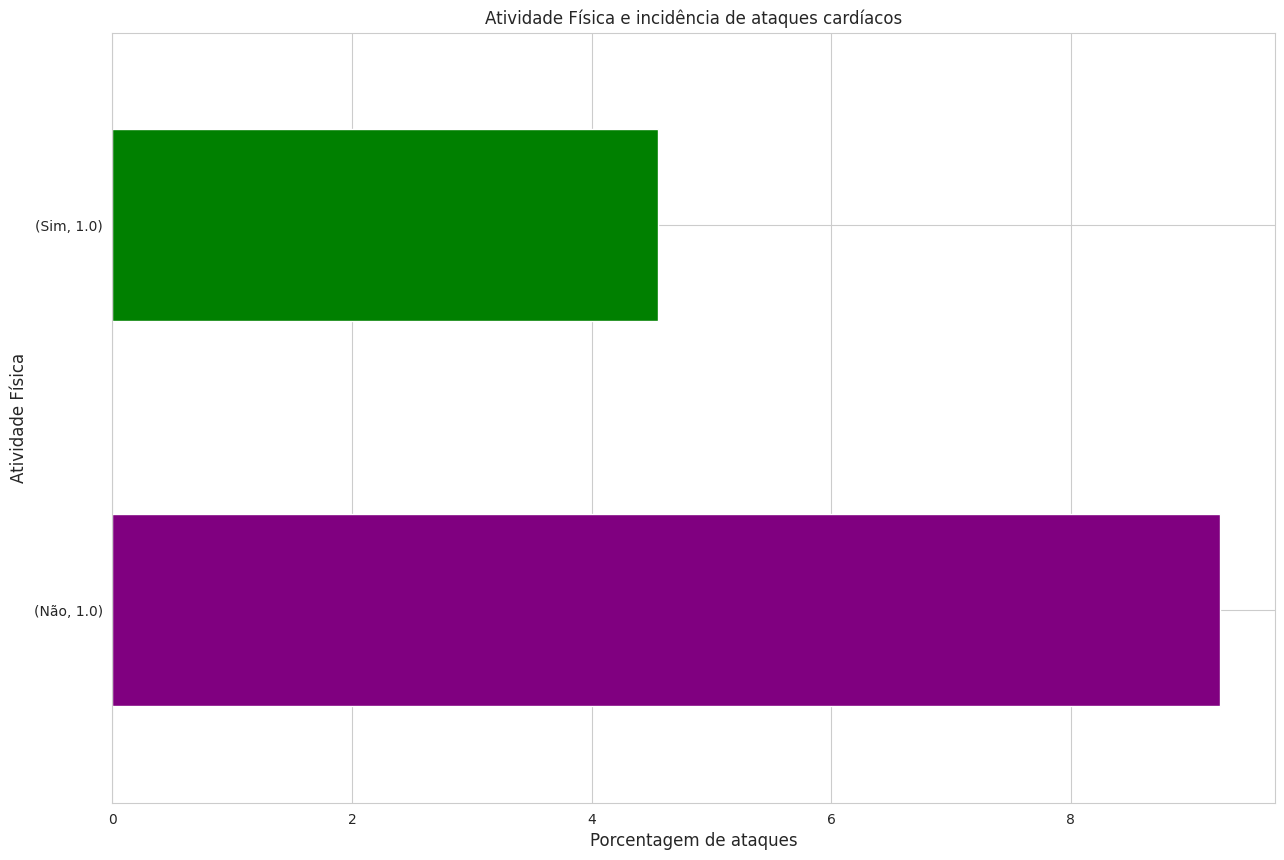

In [269]:
plt.figure(figsize=(15,10))
phh.set_index('Atividade_fisica', inplace=True)
phh.Percentage.sort_values(ascending=False).plot.barh(color=['purple', 'green'])
plt.title('Atividade Física e incidência de ataques cardíacos', fontsize=12)
plt.xlabel("Porcentagem de ataques", fontsize=12)
plt.ylabel("Atividade Física",fontsize=12)
#plt.xticks(fontsize=10)

In [270]:
plt.figure(figsize=(15,15))
cx = ss.groupby(['Estados', 'AtaqueCardíaco']).size()

<Figure size 1500x1500 with 0 Axes>

In [271]:
t = pd.DataFrame(cx.items(), columns=['Estados', 'AtaqueCardiaco'])
t

,Estados,AtaqueCardiaco
0,"(Alabama, 0.0)",4163
1,"(Alabama, 1.0)",312
2,"(Alaska, 0.0)",5491
3,"(Alaska, 1.0)",318
4,"(Arizona, 0.0)",9381
...,...,...
103,"(West Virginia, 1.0)",444
104,"(Wisconsin, 0.0)",10569
105,"(Wisconsin, 1.0)",641
106,"(Wyoming, 0.0)",3873


In [272]:
tt = ased(t)

In [273]:
tt.set_index('Estados', inplace=True)

Text(0, 0.5, 'Estados')

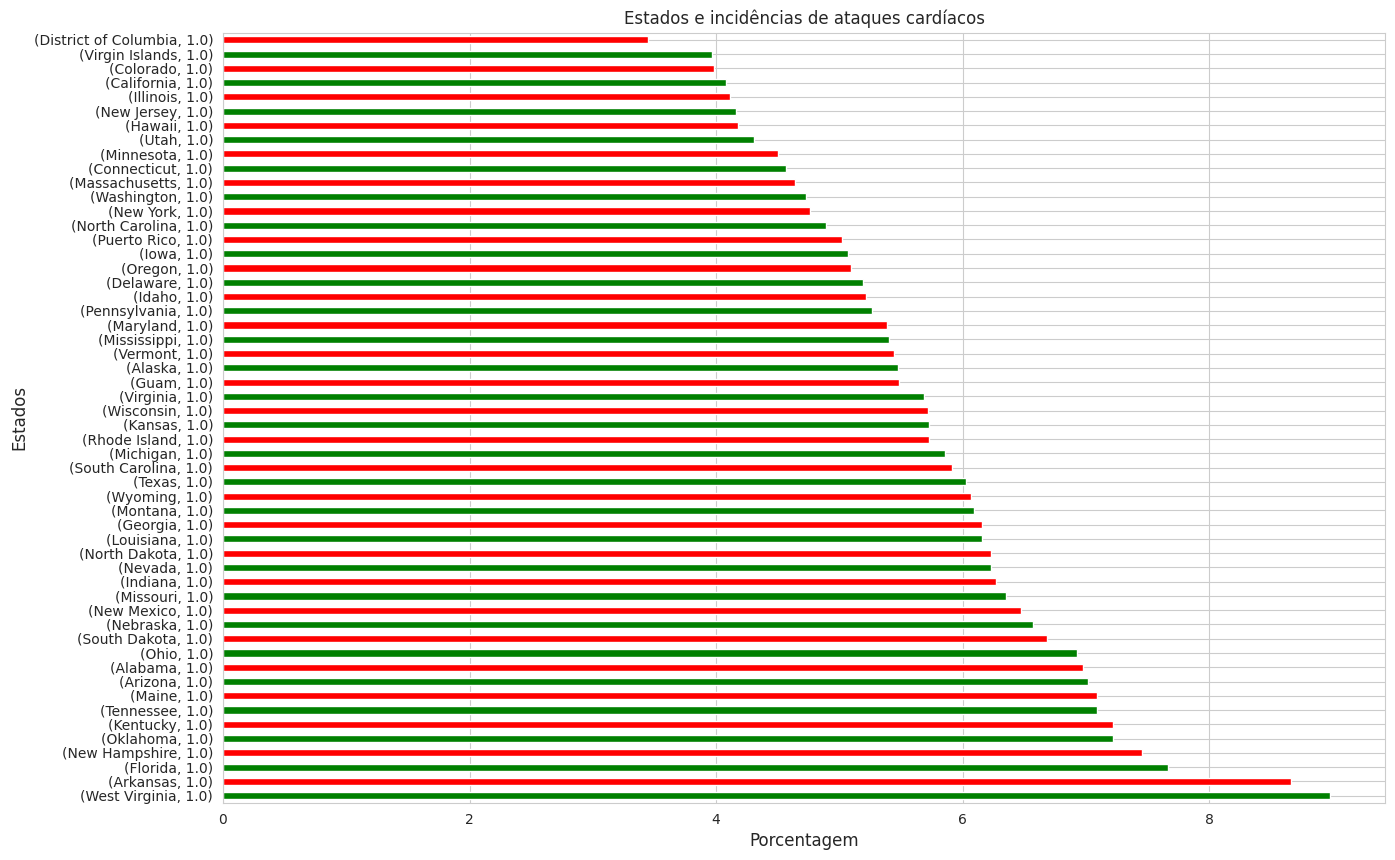

In [274]:
plt.figure(figsize=(15,10))
tt.Percentage.sort_values(ascending=False).plot.barh(color=['green', 'red'])
plt.title('Estados e incidências de ataques cardíacos', fontsize=12)
plt.xlabel('Porcentagem', fontsize=12)
plt.ylabel("Estados", fontsize=12)

In [275]:
ss.replace({'Sexo': {'Female': 'Mulher', 'Male': 'Homem'}}, inplace=True)

Text(0.5, 1.0, 'Sexo e incidência de ataques cardíacos')

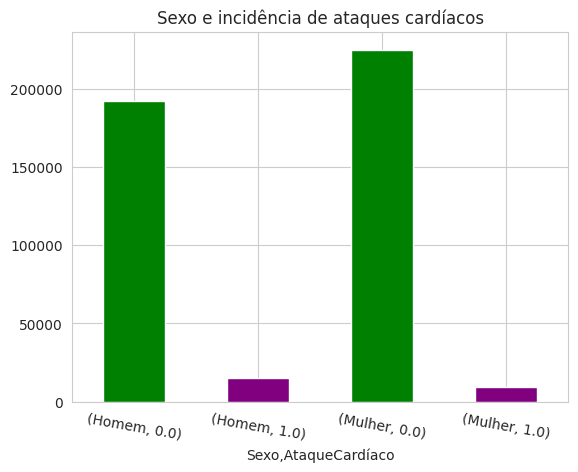

In [276]:
ss.groupby(['Sexo', 'AtaqueCardíaco']).size().plot.bar(color=['green', 'purple'], rot=350)
plt.title('Sexo e incidência de ataques cardíacos', fontsize=12)

In [277]:
ss['RemovedTeeth'].value_counts()

,count
RemovedTeeth,
None of them,233455
1 to 5,129294
"6 or more, but not all",45570
All,25453


In [278]:
ss.replace({'RemovedTeeth': {'None of them': "Nenhum Dente"}}, inplace=True)
ss.replace({'RemovedTeeth': {'1 to 5': "1 - 5"}}, inplace=True)
ss.replace({'RemovedTeeth': {'6 or more, but not all': "6 ou mais, mas não todos"}}, inplace=True)
ss.replace({'RemovedTeeth': {'All': "Todos"}}, inplace=True)

In [279]:
ss.rename(columns={'RemovedTeeth': 'DentesRemovidos'}, inplace=True)

In [280]:
ss['DentesRemovidos'] = ss['DentesRemovidos'].str.replace('6 or more, but not all', '6 ou mais, mas não todos', regex=True)

In [281]:
s = ss.groupby(['DentesRemovidos', 'AtaqueCardíaco']).size()
sx = pd.DataFrame(s.items(), columns=['DentesRemovidos', 'AtaqueCardiaco'])

In [282]:
sx

,DentesRemovidos,AtaqueCardiaco
0,"(1 - 5, 0.0)",120670
1,"(1 - 5, 1.0)",7727
2,"(6 ou mais, mas não todos, 0.0)",39682
3,"(6 ou mais, mas não todos, 1.0)",5418
4,"(Nenhum Dente, 0.0)",225915
5,"(Nenhum Dente, 1.0)",6578
6,"(Todos, 0.0)",20723
7,"(Todos, 1.0)",4344


In [283]:
ssx = ased(sx)
ssx

,DentesRemovidos,AtaqueCardiaco,Percentage
1,"(1 - 5, 1.0)",7727,6.018053
3,"(6 ou mais, mas não todos, 1.0)",5418,12.013304
5,"(Nenhum Dente, 1.0)",6578,2.829332
7,"(Todos, 1.0)",4344,17.329557


Text(0, 0.5, 'Quantidade de Dentes Removidos')

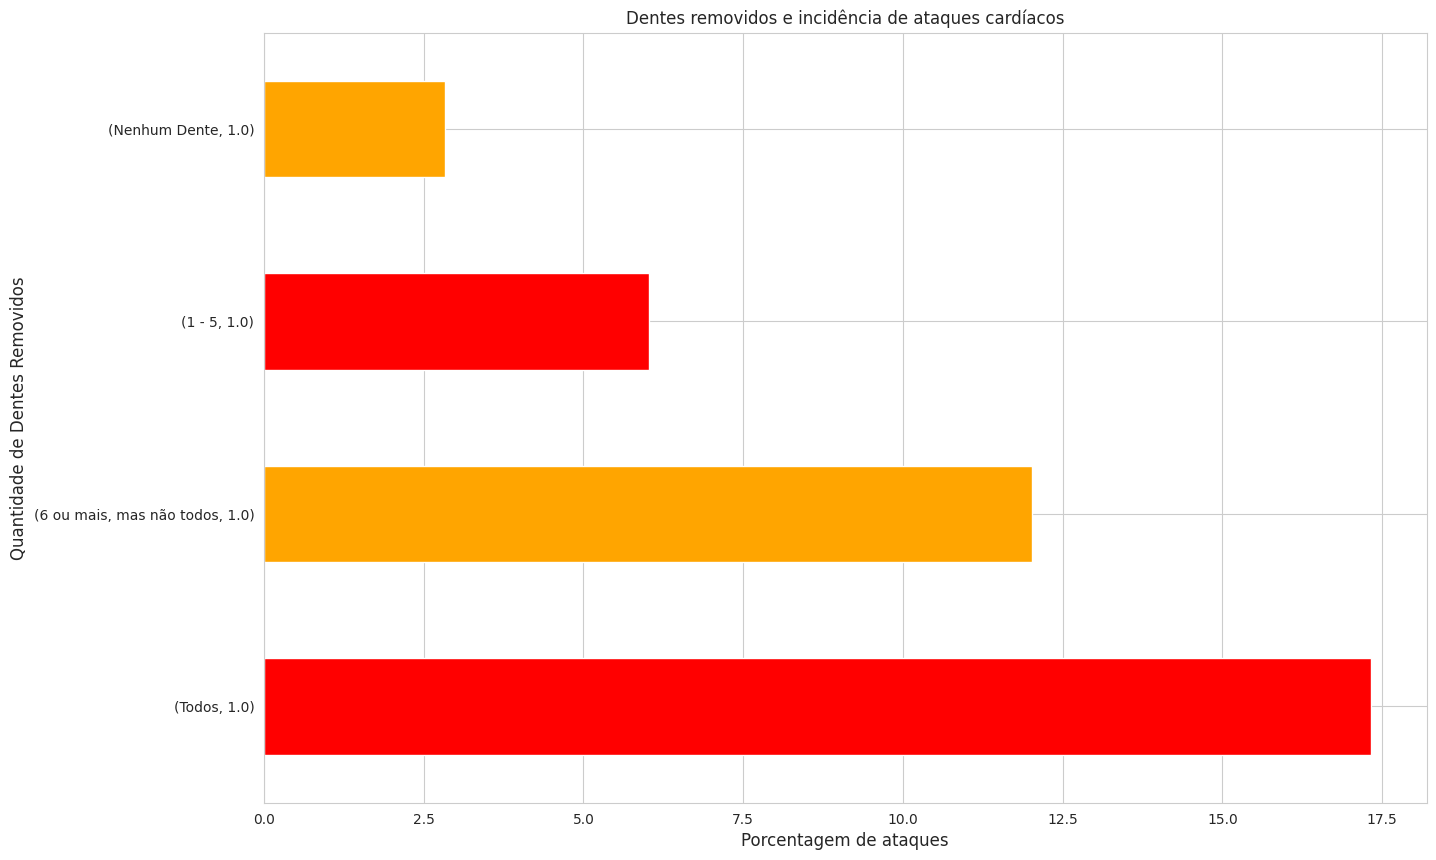

In [284]:
plt.figure(figsize=(15,10))
ssx.set_index('DentesRemovidos',  inplace=True)
ssx.Percentage.sort_values(ascending=False).plot.barh(color=['red', 'orange'])
plt.title('Dentes removidos e incidência de ataques cardíacos', fontsize=12)
plt.xlabel("Porcentagem de ataques", fontsize=12)
plt.ylabel("Quantidade de Dentes Removidos",fontsize=12)


In [285]:
za = pd.cut(ss.BMI, bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9])
ss['BMI2'] = za

In [286]:
sz = ss.groupby(['BMI2', 'AtaqueCardíaco']).size()
tt = pd.DataFrame(sz.items(), columns=['ICM', 'AtaqueCardiaco'])

<ipython-input-286-87c9cea5aff4>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [287]:
ttt = ased(tt)

Text(0.5, 0, 'Porcentagem de ataques')

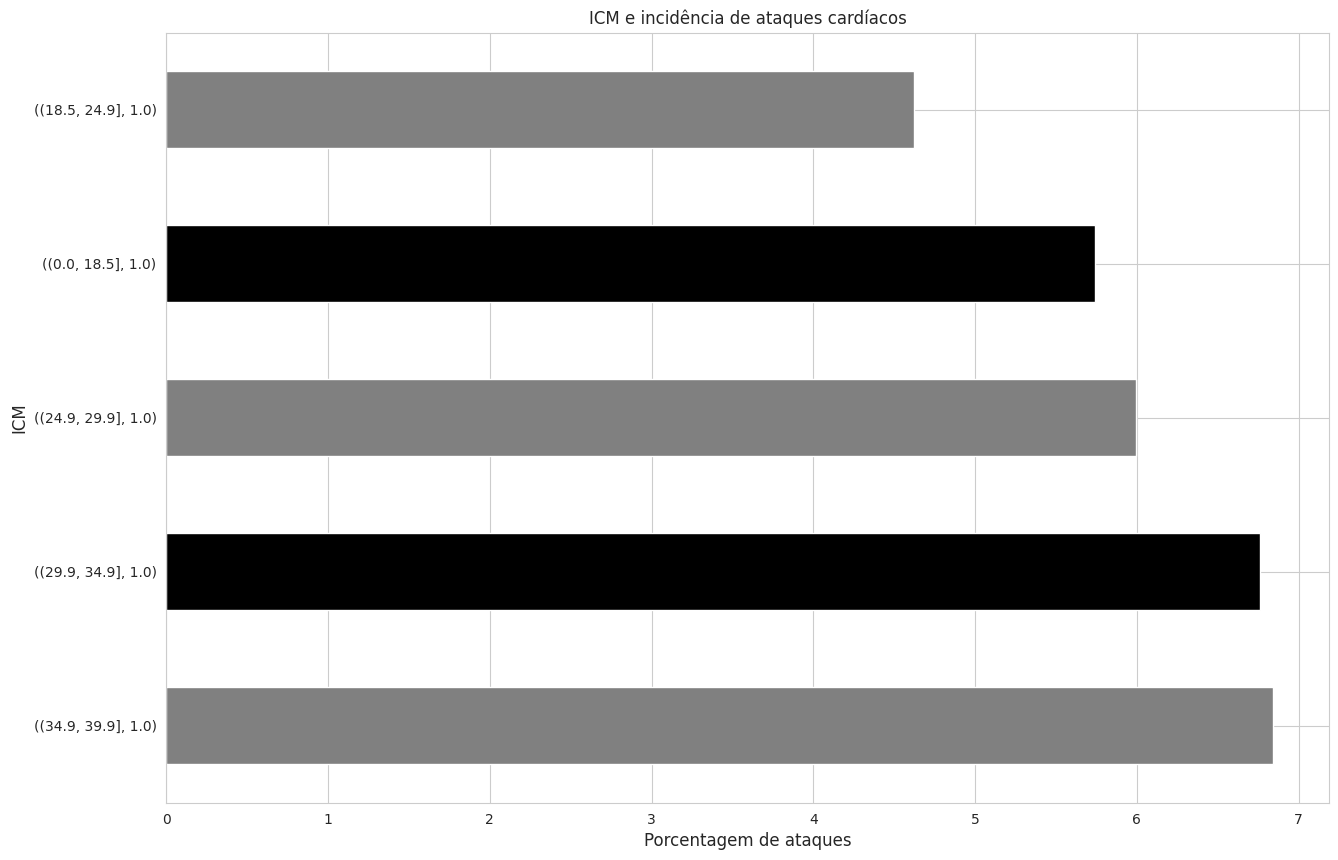

In [288]:
plt.figure(figsize=(15,10))
ttt.set_index('ICM', inplace=True)
ttt.Percentage.sort_values(ascending=False).plot.barh(color=['gray', 'black'])
plt.title('ICM e incidência de ataques cardíacos', fontsize=12)
plt.ylabel("ICM", fontsize=12)
plt.xlabel("Porcentagem de ataques",fontsize=12)

In [289]:
ff.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [290]:
categorical = ff.select_dtypes(include='O').columns.to_list()
numerical = ff.select_dtypes(exclude='O').columns.to_list()
print(categorical)
print(numerical)

['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


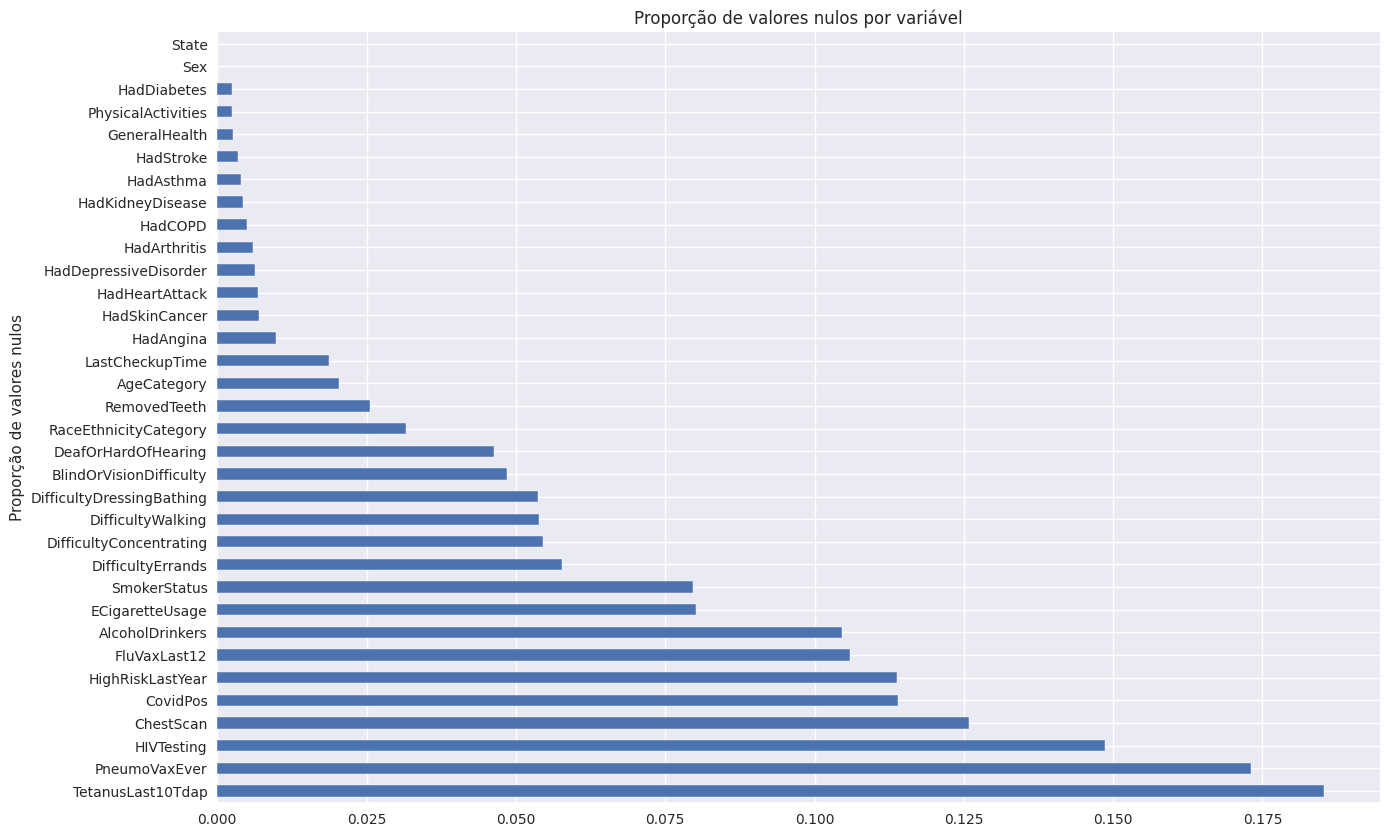

In [291]:
plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8'):
  ff[categorical].isnull().mean().sort_values(ascending=False).plot.barh()
  plt.ylabel('Proporção de valores nulos')
  plt.title('Proporção de valores nulos por variável')

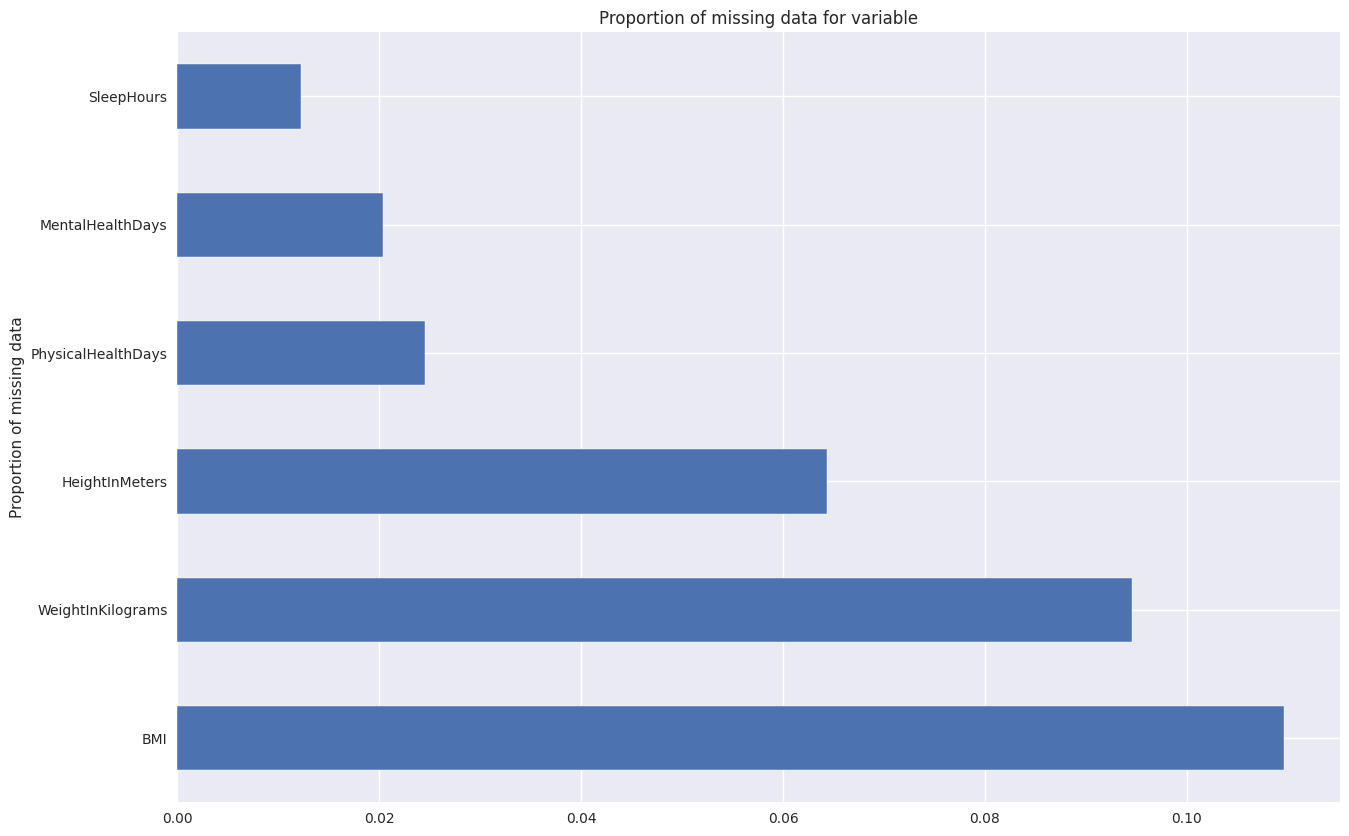

In [292]:
plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8'):
  ff[numerical].isnull().mean().sort_values(ascending=False).plot.barh()
  plt.ylabel('Proportion of missing data')
  plt.title('Proportion of missing data for variable')

In [293]:
ff.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Imputação

Chapter 3

In [294]:
ee = pd.read_csv('/content/drive/MyDrive/heart_2022_with_nans.csv')
ee

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [295]:
numerical

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd53051b430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd53051b970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd53051b190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd53051beb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd53053c190>],
 'means': []}

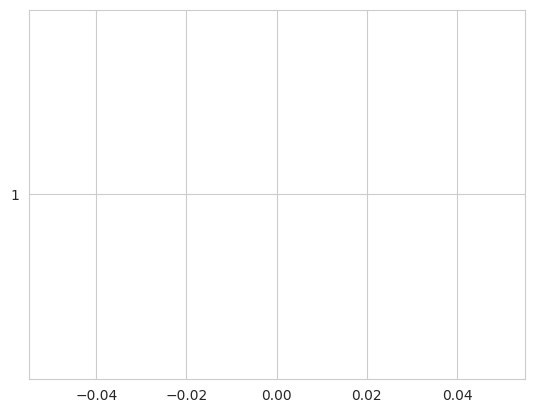

In [296]:
plt.boxplot(ee['HeightInMeters'], vert=False)

In [297]:
ee= ee[(ee['HeightInMeters'] > 1.4) & (ee['HeightInMeters'] < 2.0)]

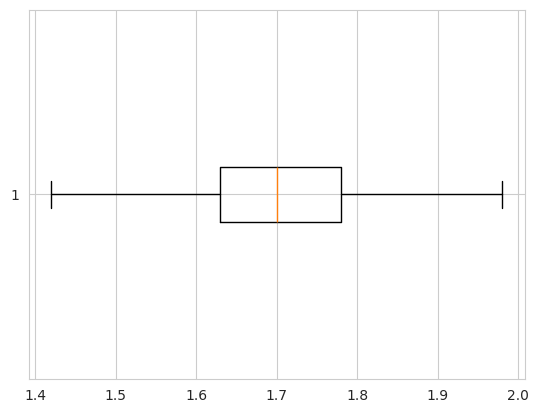

In [298]:
fig = plt.boxplot(ee['HeightInMeters'], vert=False)

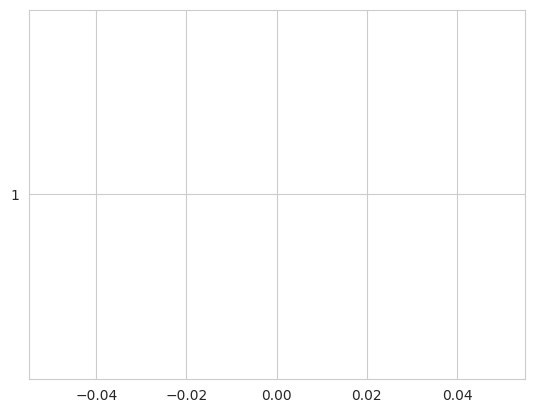

In [299]:
fig = plt.boxplot(ee['WeightInKilograms'], vert=False)

In [300]:
ee = ee[(ee['WeightInKilograms'] > 32) & (ee['WeightInKilograms'] < 128)]

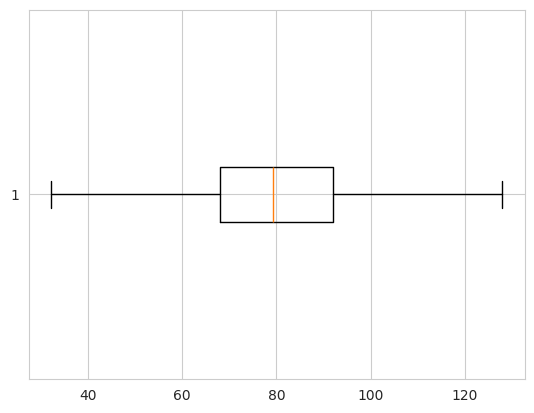

In [301]:
fig = plt.boxplot(ee['WeightInKilograms'], vert=False)

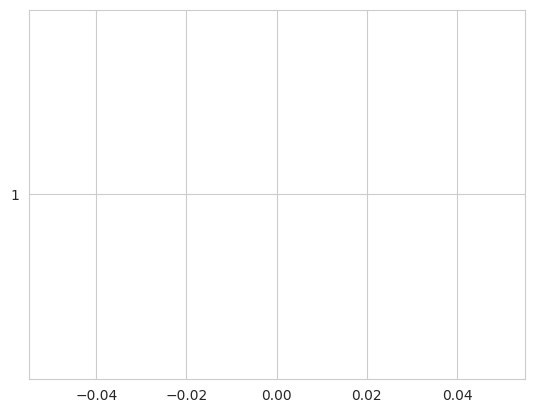

In [302]:
fig = plt.boxplot(ee['SleepHours'], vert=False)

In [303]:
ee= ee[(ee['SleepHours'] > 2.5) & (ee['SleepHours'] < 11)]

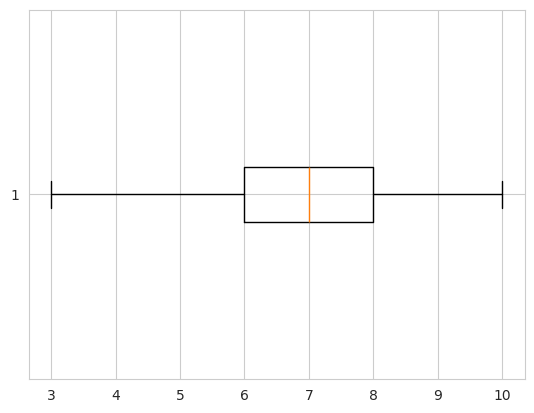

In [304]:
fig = plt.boxplot(ee['SleepHours'], vert=False)

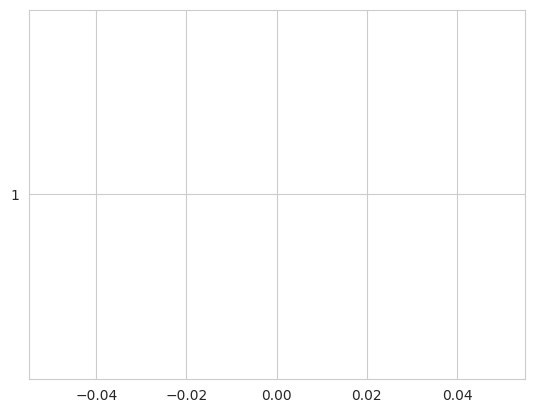

In [305]:
fig = plt.boxplot(ee['BMI'], vert=False)

In [306]:
ee = ee[(ee['BMI'] > 15) & (ee['BMI'] < 40)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd53c4e5ab0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd53c4e5ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd53c4e5810>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd53c4e6530>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd53c4e67d0>],
 'means': []}

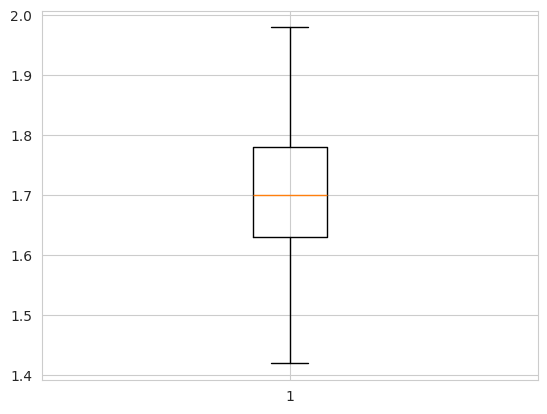

In [307]:
plt.boxplot(ee['HeightInMeters'])

In [308]:
ee.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,715
PhysicalHealthDays,7489
MentalHealthDays,6138
LastCheckupTime,5670
PhysicalActivities,650
SleepHours,0
RemovedTeeth,7774
HadHeartAttack,1945


In [309]:
numerical = ee.select_dtypes(exclude='O').columns.to_list()
numerical

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [310]:
categorical = ee.select_dtypes(include='O').columns.to_list()
categorical

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [311]:
#ee.dropna(inplace=True)

In [312]:
eenumerical = ee[numerical]

In [313]:
eenumerical

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
1,0.0,0.0,6.0,1.60,68.04,26.57
2,2.0,3.0,5.0,1.57,63.50,25.61
3,0.0,0.0,7.0,1.65,63.50,23.30
4,2.0,0.0,9.0,1.57,53.98,21.77
5,1.0,0.0,7.0,1.80,84.82,26.08
...,...,...,...,...,...,...
445127,0.0,3.0,6.0,1.65,69.85,25.63
445128,2.0,2.0,7.0,1.70,83.01,28.66
445129,30.0,30.0,5.0,1.70,49.90,17.23
445130,0.0,0.0,5.0,1.83,108.86,32.55


In [314]:
eecategorical = ee[categorical]
eecategorical

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
1,Alabama,Female,Excellent,NaN,No,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,Yes,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,Within past year (anytime less than 12 months ...,Yes,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Poor,Within past year (anytime less than 12 months ...,No,NaN,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,Within past 2 years (1 year but less than 2 ye...,Yes,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,5 or more years ago,No,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,Within past year (anytime less than 12 months ...,No,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [315]:
categoricaltwo = ['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [316]:
simplen = SimpleImputer(strategy='mean')
ct = ColumnTransformer([("imputer", simplen, numerical)], remainder="passthrough")

ct.fit(eenumerical)
en = ct.transform(eenumerical)

In [317]:

enn = pd.DataFrame(
    en,
    columns=numerical,
)

enn.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,6.0,1.60,68.04,26.57
1,2.0,3.0,5.0,1.57,63.50,25.61
2,0.0,0.0,7.0,1.65,63.50,23.30
3,2.0,0.0,9.0,1.57,53.98,21.77
4,1.0,0.0,7.0,1.80,84.82,26.08


In [318]:
enn.isnull().sum()

,0
PhysicalHealthDays,0
MentalHealthDays,0
SleepHours,0
HeightInMeters,0
WeightInKilograms,0
BMI,0


In [319]:
eecategorical.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,715
LastCheckupTime,5670
PhysicalActivities,650
RemovedTeeth,7774
HadHeartAttack,1945
HadAngina,3038
HadStroke,963
HadAsthma,1127


In [320]:
eecategorical.columns

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [321]:
ccc = ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']

In [322]:
simplec = SimpleImputer(strategy='most_frequent')
ct = ColumnTransformer([("imputer", simplec, categorical)], remainder="passthrough")

ct.fit(eecategorical)
ec = ct.transform(eecategorical)

In [323]:
ecc = pd.DataFrame(
    ec,
    columns=categorical ,
)

ecc.head()

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Excellent,Within past year (anytime less than 12 months ...,No,None of them,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
1,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
2,Alabama,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,Alabama,Female,Fair,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Male,Poor,Within past year (anytime less than 12 months ...,No,None of them,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [324]:
ecc.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
LastCheckupTime,0
PhysicalActivities,0
RemovedTeeth,0
HadHeartAttack,0
HadAngina,0
HadStroke,0
HadAsthma,0


In [325]:
gb = pd.concat([enn, ecc], axis=1)
gb

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0.0,0.0,6.0,1.60,68.04,26.57,Alabama,Female,Excellent,Within past year (anytime less than 12 months ...,No,None of them,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
1,2.0,3.0,5.0,1.57,63.50,25.61,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
2,0.0,0.0,7.0,1.65,63.50,23.30,Alabama,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,2.0,0.0,9.0,1.57,53.98,21.77,Alabama,Female,Fair,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,1.0,0.0,7.0,1.80,84.82,26.08,Alabama,Male,Poor,Within past year (anytime less than 12 months ...,No,None of them,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359476,0.0,3.0,6.0,1.65,69.85,25.63,Virgin Islands,Female,Good,Within past 2 years (1 year but less than 2 ye...,Yes,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
359477,2.0,2.0,7.0,1.70,83.01,28.66,Virgin Islands,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
359478,30.0,30.0,5.0,1.70,49.90,17.23,Virgin Islands,Female,Poor,5 or more years ago,No,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Current smoker - now smokes every day,Use them some days,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
359479,0.0,0.0,5.0,1.83,108.86,32.55,Virgin Islands,Male,Very good,Within past year (anytime less than 12 months ...,No,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [326]:
#gb = ee.copy()

In [327]:
categorical

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [328]:
eee = gb.copy()

In [329]:
encoder = BinaryEncoder(cols=['State'], drop_invariant=True)
eee = encoder.fit_transform(eee)

In [330]:
ko = pd.DataFrame(eee)
ko

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_0,State_1,State_2,State_3,State_4,State_5,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0.0,0.0,6.0,1.60,68.04,26.57,0,0,0,0,0,1,Female,Excellent,Within past year (anytime less than 12 months ...,No,None of them,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
1,2.0,3.0,5.0,1.57,63.50,25.61,0,0,0,0,0,1,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
2,0.0,0.0,7.0,1.65,63.50,23.30,0,0,0,0,0,1,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,2.0,0.0,9.0,1.57,53.98,21.77,0,0,0,0,0,1,Female,Fair,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,1.0,0.0,7.0,1.80,84.82,26.08,0,0,0,0,0,1,Male,Poor,Within past year (anytime less than 12 months ...,No,None of them,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359476,0.0,3.0,6.0,1.65,69.85,25.63,1,1,0,1,1,0,Female,Good,Within past 2 years (1 year but less than 2 ye...,Yes,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
359477,2.0,2.0,7.0,1.70,83.01,28.66,1,1,0,1,1,0,Female,Excellent,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
359478,30.0,30.0,5.0,1.70,49.90,17.23,1,1,0,1,1,0,Female,Poor,5 or more years ago,No,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Current smoker - now smokes every day,Use them some days,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
359479,0.0,0.0,5.0,1.83,108.86,32.55,1,1,0,1,1,0,Male,Very good,Within past year (anytime less than 12 months ...,No,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [331]:
ko.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'State_0', 'State_1',
       'State_2', 'State_3', 'State_4', 'State_5', 'Sex', 'GeneralHealth',
       'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [332]:
ko.isnull().sum()

,0
PhysicalHealthDays,0
MentalHealthDays,0
SleepHours,0
HeightInMeters,0
WeightInKilograms,0
BMI,0
State_0,0
State_1,0
State_2,0
State_3,0


In [333]:
ohe_enc = OneHotEncoder(
    variables=['Sex',	'LastCheckupTime','PhysicalActivities',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'ChestScan',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'HighRiskLastYear',
 'CovidPos']
)
ko = ohe_enc.fit_transform(ko)

In [334]:
ko

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_0,State_1,State_2,State_3,State_4,State_5,GeneralHealth,RemovedTeeth,HadHeartAttack,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,TetanusLast10Tdap,Sex_Female,Sex_Male,...,DifficultyConcentrating_Yes,DifficultyWalking_No,DifficultyWalking_Yes,DifficultyDressingBathing_No,DifficultyDressingBathing_Yes,DifficultyErrands_No,DifficultyErrands_Yes,ChestScan_No,ChestScan_Yes,AlcoholDrinkers_No,AlcoholDrinkers_Yes,HIVTesting_No,HIVTesting_Yes,FluVaxLast12_No,FluVaxLast12_Yes,PneumoVaxEver_No,PneumoVaxEver_Yes,HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Yes,CovidPos_Tested positive using home test without a health professional
0,0.0,0.0,6.0,1.60,68.04,26.57,0,0,0,0,0,1,Excellent,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
1,2.0,3.0,5.0,1.57,63.50,25.61,0,0,0,0,0,1,Very good,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
2,0.0,0.0,7.0,1.65,63.50,23.30,0,0,0,0,0,1,Excellent,None of them,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0
3,2.0,0.0,9.0,1.57,53.98,21.77,0,0,0,0,0,1,Fair,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0
4,1.0,0.0,7.0,1.80,84.82,26.08,0,0,0,0,0,1,Poor,None of them,Yes,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,"No, did not receive any tetanus shot in the pa...",0,1,...,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359476,0.0,3.0,6.0,1.65,69.85,25.63,1,1,0,1,1,0,Good,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 18 to 24,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0
359477,2.0,2.0,7.0,1.70,83.01,28.66,1,1,0,1,1,0,Excellent,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,"Yes, received tetanus shot but not sure what type",1,0,...,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0
359478,30.0,30.0,5.0,1.70,49.90,17.23,1,1,0,1,1,0,Poor,1 to 5,No,Current smoker - now smokes every day,Use them some days,"White only, Non-Hispanic",Age 65 to 69,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0
359479,0.0,0.0,5.0,1.83,108.86,32.55,1,1,0,1,1,0,Very good,None of them,Yes,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,"No, did not receive any tetanus shot in the pa...",0,1,...,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0


In [335]:
ko = pd.DataFrame(ko)
ko

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_0,State_1,State_2,State_3,State_4,State_5,GeneralHealth,RemovedTeeth,HadHeartAttack,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,TetanusLast10Tdap,Sex_Female,Sex_Male,...,DifficultyConcentrating_Yes,DifficultyWalking_No,DifficultyWalking_Yes,DifficultyDressingBathing_No,DifficultyDressingBathing_Yes,DifficultyErrands_No,DifficultyErrands_Yes,ChestScan_No,ChestScan_Yes,AlcoholDrinkers_No,AlcoholDrinkers_Yes,HIVTesting_No,HIVTesting_Yes,FluVaxLast12_No,FluVaxLast12_Yes,PneumoVaxEver_No,PneumoVaxEver_Yes,HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Yes,CovidPos_Tested positive using home test without a health professional
0,0.0,0.0,6.0,1.60,68.04,26.57,0,0,0,0,0,1,Excellent,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
1,2.0,3.0,5.0,1.57,63.50,25.61,0,0,0,0,0,1,Very good,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
2,0.0,0.0,7.0,1.65,63.50,23.30,0,0,0,0,0,1,Excellent,None of them,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0
3,2.0,0.0,9.0,1.57,53.98,21.77,0,0,0,0,0,1,Fair,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0
4,1.0,0.0,7.0,1.80,84.82,26.08,0,0,0,0,0,1,Poor,None of them,Yes,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,"No, did not receive any tetanus shot in the pa...",0,1,...,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359476,0.0,3.0,6.0,1.65,69.85,25.63,1,1,0,1,1,0,Good,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 18 to 24,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0
359477,2.0,2.0,7.0,1.70,83.01,28.66,1,1,0,1,1,0,Excellent,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,"Yes, received tetanus shot but not sure what type",1,0,...,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0
359478,30.0,30.0,5.0,1.70,49.90,17.23,1,1,0,1,1,0,Poor,1 to 5,No,Current smoker - now smokes every day,Use them some days,"White only, Non-Hispanic",Age 65 to 69,"No, did not receive any tetanus shot in the pa...",1,0,...,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0
359479,0.0,0.0,5.0,1.83,108.86,32.55,1,1,0,1,1,0,Very good,None of them,Yes,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,"No, did not receive any tetanus shot in the pa...",0,1,...,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0


In [336]:
vv = ['GeneralHealth', 'RemovedTeeth', 'RaceEthnicityCategory', 'AgeCategory','TetanusLast10Tdap', 'SmokerStatus','ECigaretteUsage']
le = LabelEncoder()
ko[vv] = ko[vv].apply(LabelEncoder().fit_transform)

In [337]:
ko

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_0,State_1,State_2,State_3,State_4,State_5,GeneralHealth,RemovedTeeth,HadHeartAttack,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,TetanusLast10Tdap,Sex_Female,Sex_Male,...,DifficultyConcentrating_Yes,DifficultyWalking_No,DifficultyWalking_Yes,DifficultyDressingBathing_No,DifficultyDressingBathing_Yes,DifficultyErrands_No,DifficultyErrands_Yes,ChestScan_No,ChestScan_Yes,AlcoholDrinkers_No,AlcoholDrinkers_Yes,HIVTesting_No,HIVTesting_Yes,FluVaxLast12_No,FluVaxLast12_Yes,PneumoVaxEver_No,PneumoVaxEver_Yes,HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Yes,CovidPos_Tested positive using home test without a health professional
0,0.0,0.0,6.0,1.60,68.04,26.57,0,0,0,0,0,1,0,3,No,3,0,4,12,0,1,0,...,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
1,2.0,3.0,5.0,1.57,63.50,25.61,0,0,0,0,0,1,4,3,No,3,0,4,7,0,1,0,...,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
2,0.0,0.0,7.0,1.65,63.50,23.30,0,0,0,0,0,1,0,3,No,1,0,4,9,0,1,0,...,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0
3,2.0,0.0,9.0,1.57,53.98,21.77,0,0,0,0,0,1,1,3,No,3,0,4,4,0,1,0,...,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0
4,1.0,0.0,7.0,1.80,84.82,26.08,0,0,0,0,0,1,3,3,Yes,3,0,4,12,0,0,1,...,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359476,0.0,3.0,6.0,1.65,69.85,25.63,1,1,0,1,1,0,2,3,No,3,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0
359477,2.0,2.0,7.0,1.70,83.01,28.66,1,1,0,1,1,0,0,3,No,3,0,0,6,2,1,0,...,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0
359478,30.0,30.0,5.0,1.70,49.90,17.23,1,1,0,1,1,0,3,0,No,0,3,4,9,0,1,0,...,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0
359479,0.0,0.0,5.0,1.83,108.86,32.55,1,1,0,1,1,0,4,3,Yes,3,0,0,10,0,0,1,...,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0


In [338]:
ko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359481 entries, 0 to 359480
Data columns (total 75 columns):
 #   Column                                                                   Non-Null Count   Dtype  
---  ------                                                                   --------------   -----  
 0   PhysicalHealthDays                                                       359481 non-null  float64
 1   MentalHealthDays                                                         359481 non-null  float64
 2   SleepHours                                                               359481 non-null  float64
 3   HeightInMeters                                                           359481 non-null  float64
 4   WeightInKilograms                                                        359481 non-null  float64
 5   BMI                                                                      359481 non-null  float64
 6   State_0                                                     

In [339]:
ko.replace({'HadHeartAttack': {'No': 0, 'Yes':1}}, inplace=True)

<ipython-input-339-3aa46e39cab4>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [340]:
x = ko.drop(columns=['HadHeartAttack'], axis=1)
y = ko['HadHeartAttack']

In [341]:
er = x.columns

In [342]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y, random_state=42)

In [343]:
mi = MinMaxScaler()
xtrains = mi.fit_transform(x_train)
xtests = mi.transform(x_test)

In [344]:
y_train

,HadHeartAttack
126436,0
23037,0
265139,0
11046,0
289662,0
...,...
118586,0
320155,0
119885,0
85864,0


In [345]:
ad = ADASYN(random_state=0)
x_res, y_res = ad.fit_resample(xtrains,y_train)

In [346]:
all = AllKNN(sampling_strategy='auto', n_neighbors=200, kind_sel='all')
enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=70, kind_sel='all')
rus = RandomUnderSampler(sampling_strategy=1.0,random_state=0)

In [347]:
log = LogisticRegression(max_iter=100, C=5, penalty='l1', solver='liblinear')
log.fit(xtrains, y_train)
rr = log.predict(xtests)
hh = accuracy_score(rr, y_test)
kk = log.predict(xtrains)
ol = accuracy_score(kk, y_train)
print(hh)
print(ol)

0.9466876225711782
0.9462348392121954


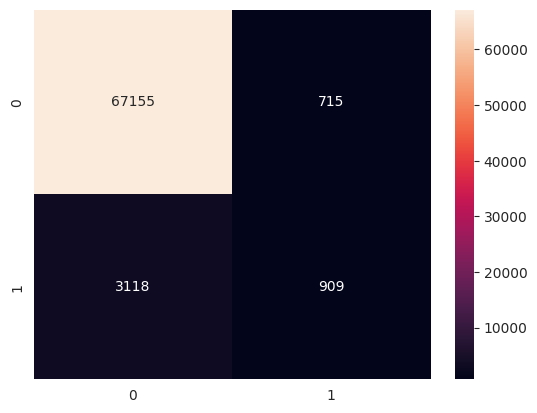

In [348]:
confusion = confusion_matrix(y_true=y_test,y_pred=rr)
er = sns.heatmap(confusion, annot=True, fmt='1')

In [349]:
log = LogisticRegression(max_iter=100, C=5, penalty='l1', solver='liblinear')
log.fit(x_res, y_res)
bb = log.predict(xtests)
cc = accuracy_score(bb, y_test)
dd = log.predict(x_res)
ii = accuracy_score(dd, y_res)
print(cc)
print(ii)

0.7933293461479617
0.7796428072086127


In [350]:
confusion = confusion_matrix(y_true=y_test,y_pred=bb)
confusion

array([[53848, 14022],
       [  837,  3190]])

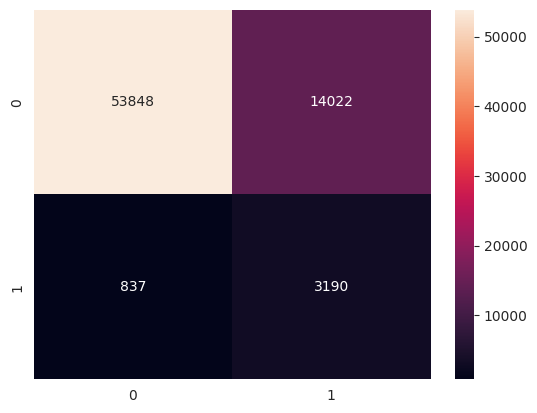

In [351]:
er = sns.heatmap(confusion, annot=True, fmt='1')

In [352]:
print(classification_report(y_test, bb ))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88     67870
           1       0.19      0.79      0.30      4027

    accuracy                           0.79     71897
   macro avg       0.59      0.79      0.59     71897
weighted avg       0.94      0.79      0.85     71897

